In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/index_calculate_2.xlsx',sheet_name='Sheet2')

In [ ]:
df.drop(['Tumour types'],axis=1,inplace=True)


In [ ]:
df1=df.copy()

In [ ]:
df.columns

Index(['Top_dia', 'Top_Shape', 'Walk_C', 'Top_Charge', 'Top_PSA', 'S_log',
       'R_B_C', 'Wiener', 'Z1', 'Z2', 'Acid_Base', 'Arom_atic', 'Arom_atic_1',
       'Atom_Count', 'Atom_Count_1', 'Atom_Count_2', 'Atom_Count_3',
       'Atom_Count_4', 'Atom_Count_5', 'Auto_correlation',
       'Auto_correlation_1', 'Auto_correlation_2', 'Auto_correlation_3',
       'Auto_correlation_4', 'Auto_correlation_5', 'Balaban_J', 'Bertz_CT',
       'Bond_Count', 'Carbon_Types', 'Constitu_tional', 'Constitu_tional_1',
       'Eccentric_Connectivity_Index', 'E_State', 'Fragment_Complexity',
       'Frame_work', 'Hydrogen_Bond', 'Hydrogen_Bond_1', 'Information_Content',
       'Information_Content_1', 'Information_Content_2',
       'Information_Content_4', 'Information_Content_5',
       'Information_Content_6', 'Lip_inski', 'Lip_inski_1', 'Log_S',
       'Mc_GowanVolume', 'Moe_Type', 'Moe_Type_1', 'Moe_Type_2', 'Moe_Type_3',
       'Moe_Type_4', 'Moe_Type_5', 'Path_Count', 'Polariz_ability',
       'P

In [ ]:
df['Lip_inski'].replace(True,1,inplace=True)
df['Lip_inski'].replace(False,0,inplace=True)
df['Lip_inski_1'].replace(True,1,inplace=True)
df['Lip_inski_1'].replace(False,0,inplace=True)

<ipython-input-7-ad5b651e0da5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lip_inski'].replace(True,1,inplace=True)
<ipython-input-7-ad5b651e0da5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lip_inski'].replace(False,0,inplace=True)
<ipython-input-7-ad5b651e0da5>:3: FutureWarning: 

In [ ]:
df_cols=list(df.columns)
df_cols.remove('Top_PSA')

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
X=df[df_cols]
# 'Top_PSA'
y=df['Top_PSA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# X=df.iloc[:,:-2]
# y=df.iloc[:,-2]

In [ ]:
len(X.columns)

57

In [ ]:
skewed_cols=[]
for col in X.columns:
  if df[col].skew()>1 or df[col].skew()<-1:
    skewed_cols.append(col)
    print(f'{col} {df[col].skew()}')
len(skewed_cols)

Walk_C 1.2216899261996352
R_B_C 2.570118315182229
Wiener 6.878758417992771
Z1 1.1014060244502046
Acid_Base 2.5690149173583814
Atom_Count 1.521590553861271
Atom_Count_1 1.4018016202747685
Atom_Count_2 4.439699925314756
Atom_Count_3 6.944228368364936
Atom_Count_4 2.1052335122776777
Atom_Count_5 1.6341066306820944
Auto_correlation 2.923145792232534
Auto_correlation_1 6.597495486490132
Auto_correlation_2 3.7166671618137044
Auto_correlation_3 6.924899920792241
Bertz_CT 1.1537389057215701
Bond_Count 1.433311824930852
Carbon_Types 1.179883109315031
Constitu_tional 1.4254109969271707
Constitu_tional_1 2.096259929551523
Fragment_Complexity 1.622676839985666
Hydrogen_Bond 1.728104823788378
Hydrogen_Bond_1 2.7384192866689965
Information_Content_1 1.6208665612134099
Information_Content_2 1.347365043546179
Information_Content_5 4.223054081418386
Information_Content_6 1.496952880994043
Mc_GowanVolume 1.5546729825311663
Moe_Type 1.402625106271222
Moe_Type_1 1.9710287899966985
Moe_Type_2 1.41352272065

38

In [ ]:
# for col in skewed_cols:
#   sns.distplot(df[col],color='darkblue')
#   plt.show()

In [ ]:
# i=0
# plt.figure(figsize=(16,16))
# for col in skewed_cols:
#   i+=1
#   plt.subplot(8,5,i)
#   sns.distplot(df[col])
#   plt.xlabel(f'{col}')
# plt.tight_layout()
# plt.savefig('SkewedDistributions.eps')
#   # plt.show()

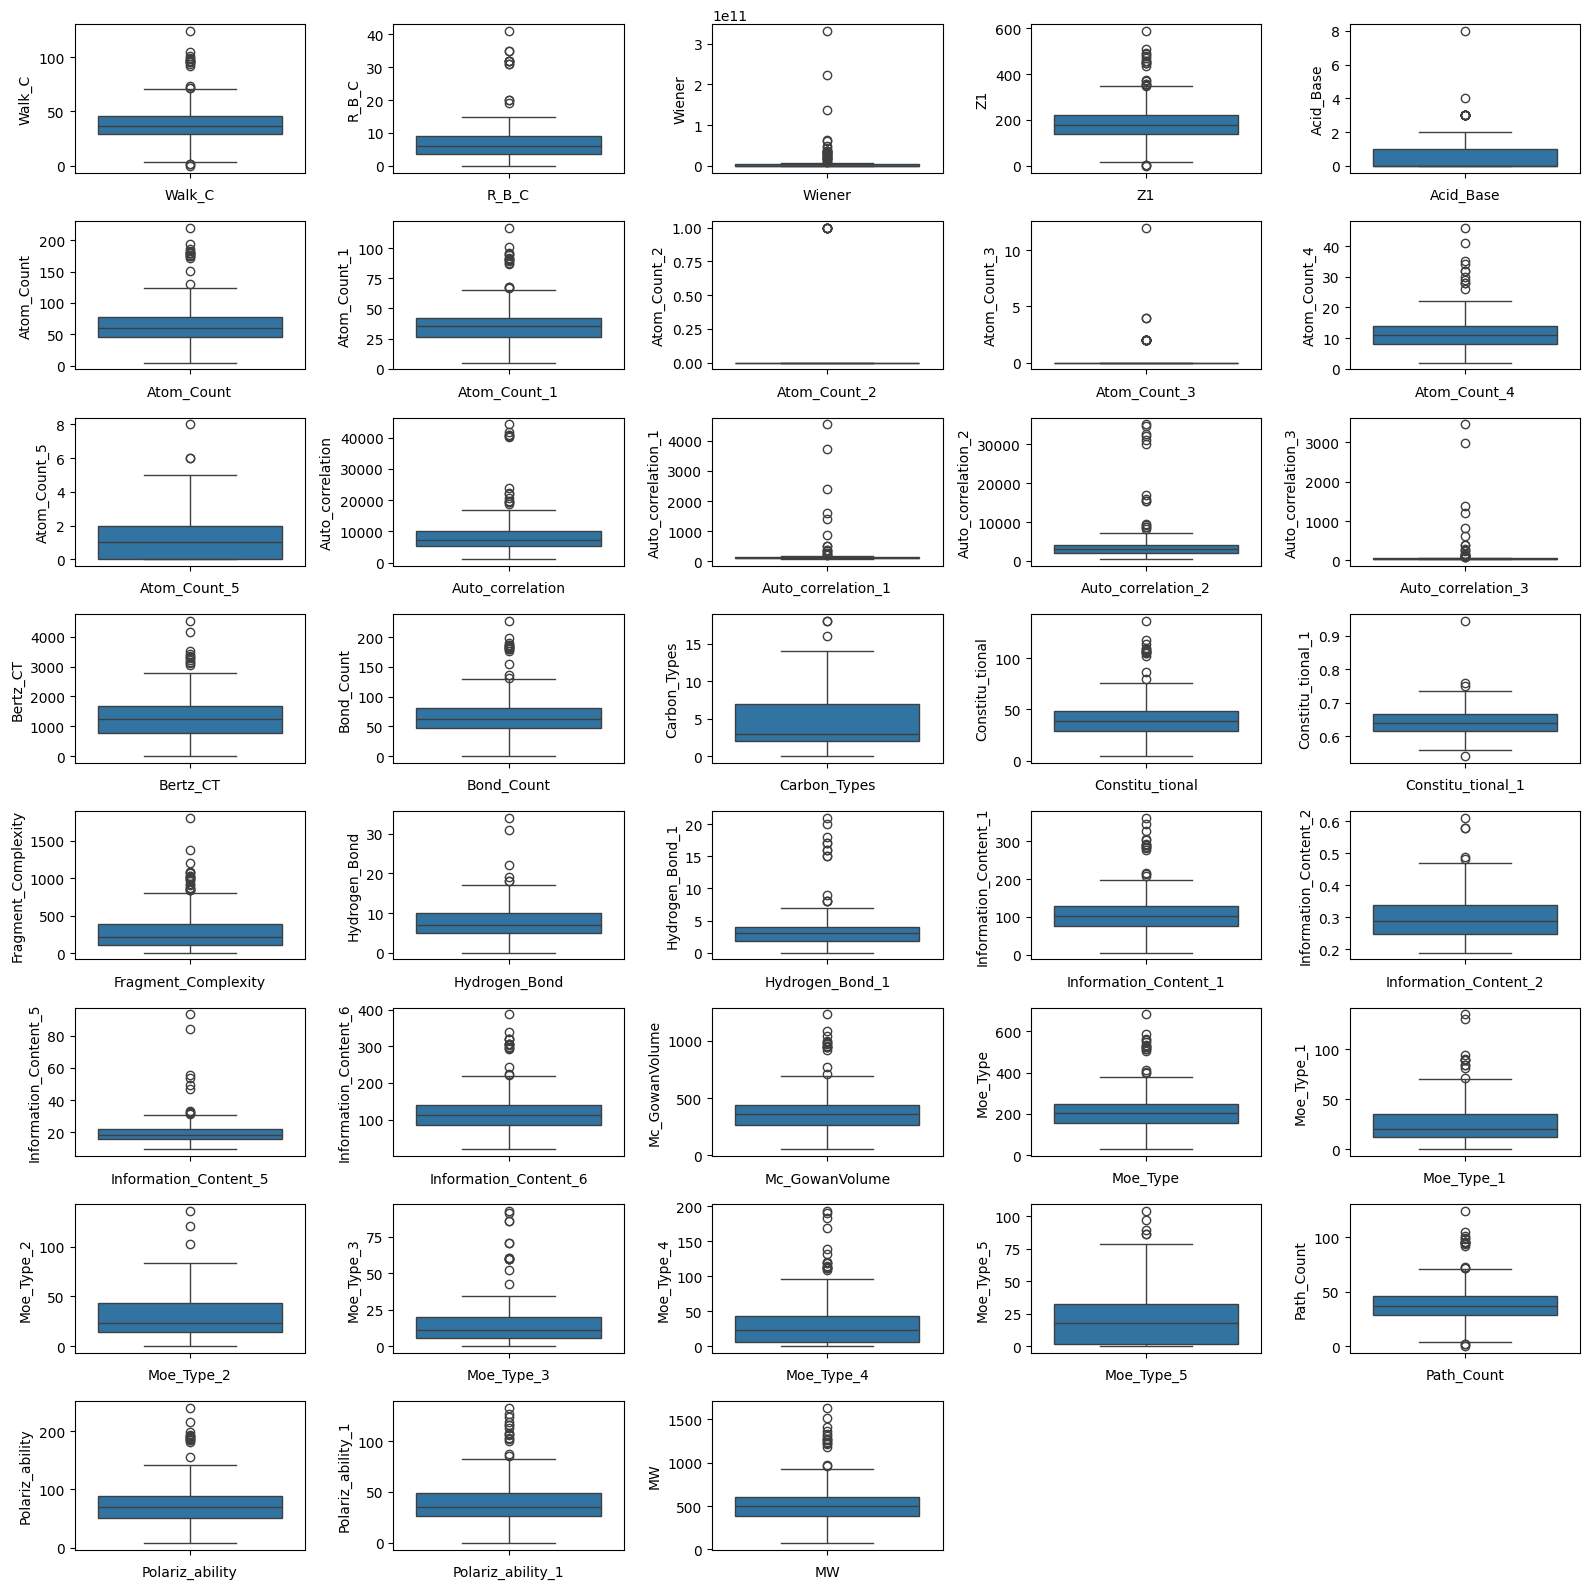

In [ ]:
i=0
plt.figure(figsize=(16,16))
for col in skewed_cols:
  i+=1
  plt.subplot(8,5,i)
  sns.boxplot(df[col])
  plt.xlabel(f'{col}')
plt.tight_layout()
plt.savefig('BP_skewed.eps')
  # plt.show()

In [ ]:
# plt.figure(figsize=(16,16))
# plt.boxplot(x=df[skewed_cols])
# plt.ylim(0,400000000000)
# plt.show()


In [ ]:
# for col in skewed_cols:
#   sns.boxplot(df[col],color='darkblue')
#   plt.show()

In [ ]:
# plt.hist

In [ ]:
# skewed_cols[:20]

In [ ]:
# plt.figure(figsize=(15,15))
# fig,axs=plt.subplots(5,4)
# for col in skewed_cols[:20]:
#   for i in range(10):
#     for j in range(4):
#       axs[i,j].hist(df[col])
#       # sns.distplot(df[col])
#       plt.xlabel(f'{col}')
#       break
#     break
#       # plt.show()

In [ ]:
# plt.figure(figsize=(15,15))
# fig,axs=plt.subplots(5,4)
# i=0
# j=0
# counter=0
# counter1=0
# for col in skewed_cols[:20]:
#   counter+=1
#   counter1+=1
#   axs[i,j].hist(df[col])
#   # sns.distplot(df[col])
#   plt.xlabel(f'{col}')
#   if counter1==4:
#     j=0
#     counter1=0
#   # j+=1
#   if counter==5 or counter==10:
#     i+=1



In [ ]:
skewed_cols

['Walk_C',
 'R_B_C',
 'Wiener',
 'Z1',
 'Acid_Base',
 'Atom_Count',
 'Atom_Count_1',
 'Atom_Count_2',
 'Atom_Count_3',
 'Atom_Count_4',
 'Atom_Count_5',
 'Auto_correlation',
 'Auto_correlation_1',
 'Auto_correlation_2',
 'Auto_correlation_3',
 'Bertz_CT',
 'Bond_Count',
 'Carbon_Types',
 'Constitu_tional',
 'Constitu_tional_1',
 'Fragment_Complexity',
 'Hydrogen_Bond',
 'Hydrogen_Bond_1',
 'Information_Content_1',
 'Information_Content_2',
 'Information_Content_5',
 'Information_Content_6',
 'Mc_GowanVolume',
 'Moe_Type',
 'Moe_Type_1',
 'Moe_Type_2',
 'Moe_Type_3',
 'Moe_Type_4',
 'Moe_Type_5',
 'Path_Count',
 'Polariz_ability',
 'Polariz_ability_1',
 'MW']

In [ ]:
#adjusting outlier of skewed cols
for col in skewed_cols:
  Q1=np.quantile(df[col],0.25)
  Q3=np.quantile(df[col],0.75)
  IQR=Q3-Q1
  df[col]=np.where(df[col]>Q3+1.5*IQR,Q3+1.5*IQR,np.where(df[col]<Q1-1.5*IQR,Q1-1.5*IQR,df[col]))

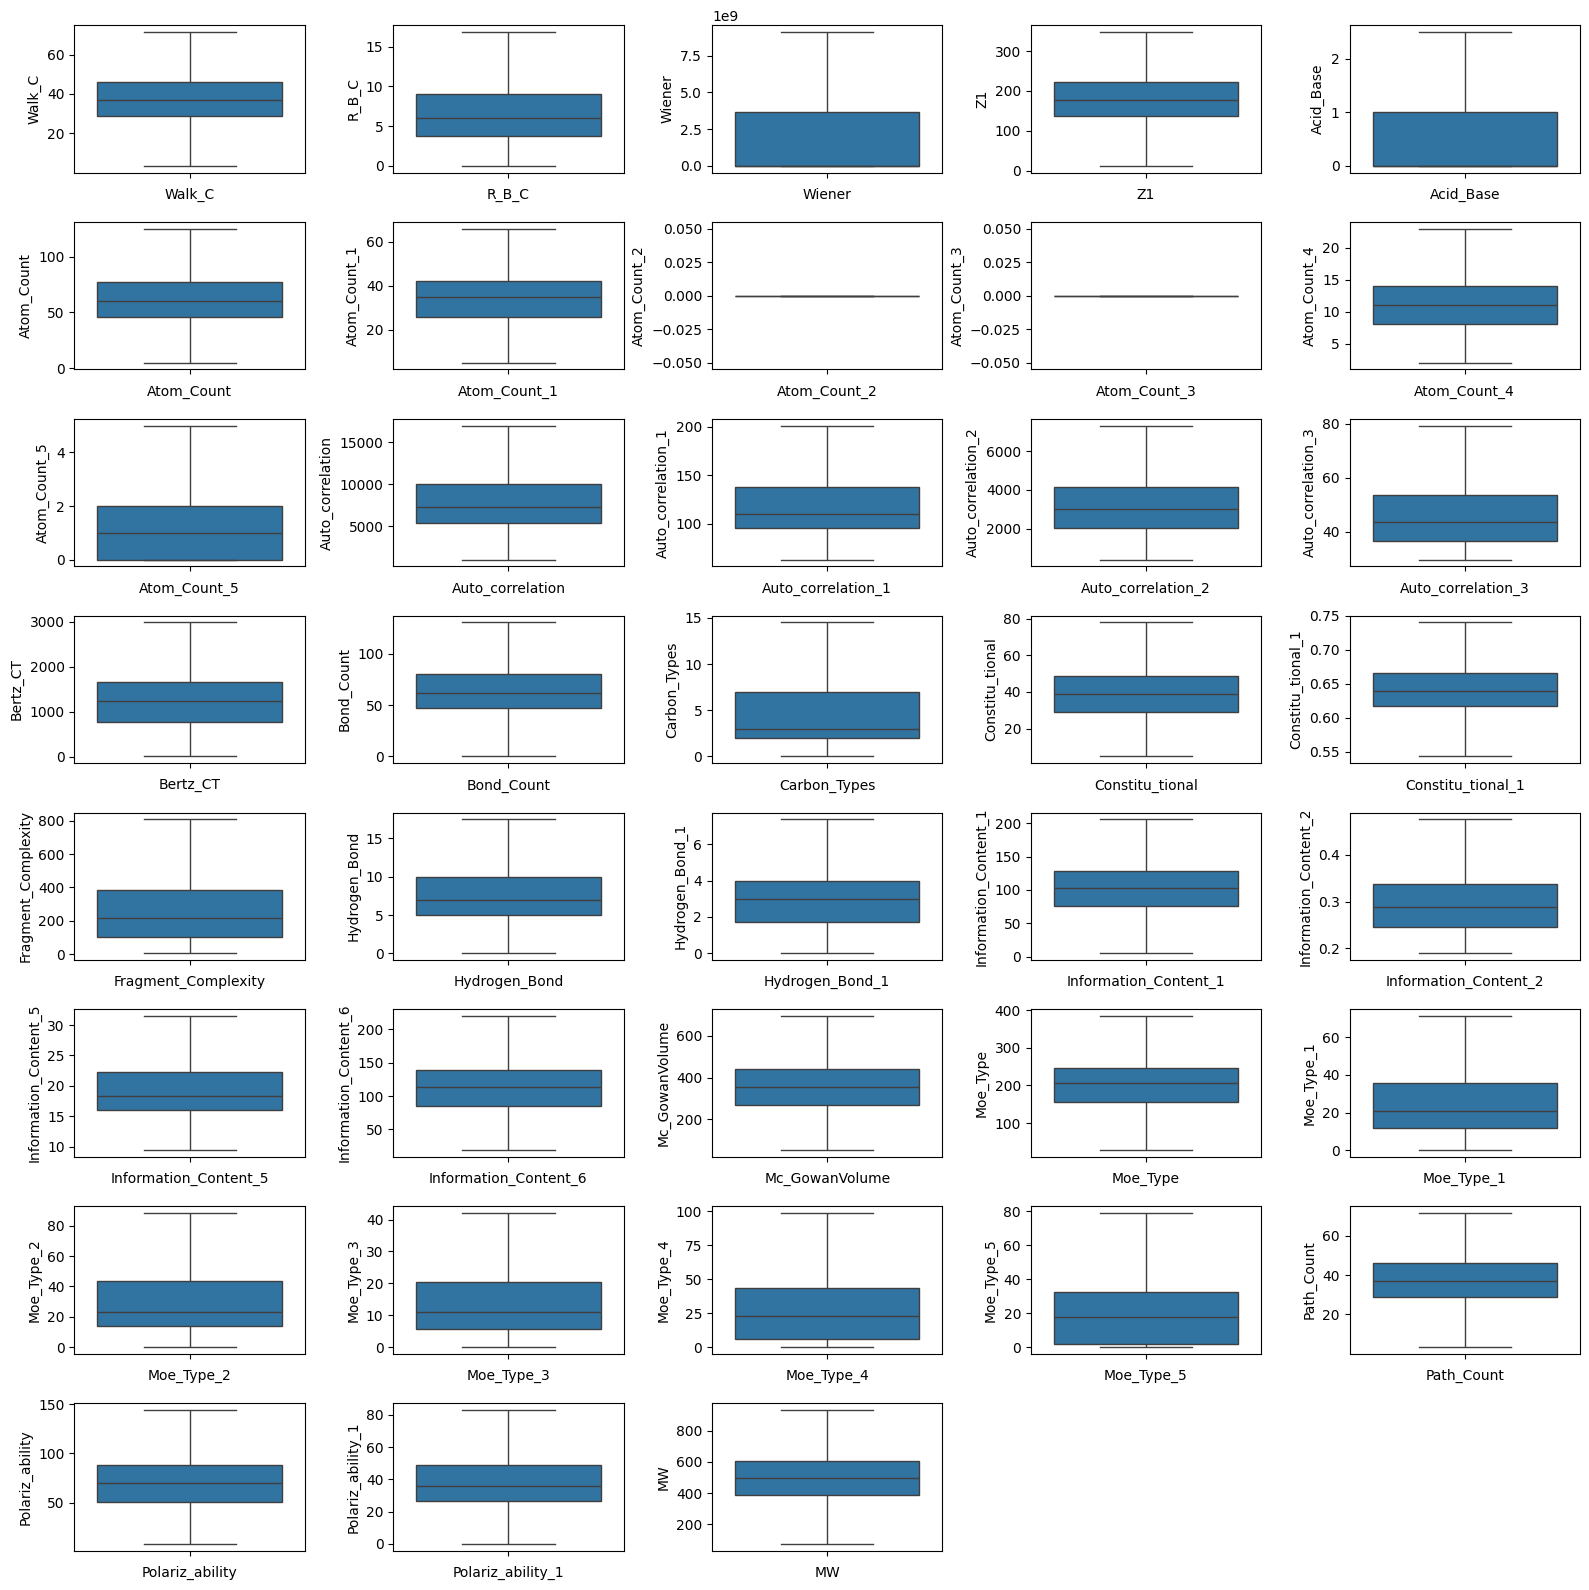

In [ ]:
i=0
plt.figure(figsize=(16,16))
for col in skewed_cols:
  i+=1
  plt.subplot(8,5,i)
  sns.boxplot(df[col])
  plt.xlabel(f'{col}')
plt.tight_layout()
plt.savefig('BPA_skewed.eps')
  # plt.show()

In [ ]:
# for col in skewed_cols:
#   sns.boxplot(df[col],color='darkblue')
#   plt.show()

In [ ]:
# type(X.columns)
# list(X.columns)

In [ ]:
non_skewed_cols=[]
for col in X.columns:
  if df1[col].skew()<1 and df1[col].skew()>-1:
    non_skewed_cols.append(col)
    print(f'{col}  {df1[col].skew()}')
len(non_skewed_cols)

Top_dia  0.653057917373418
Top_Shape  -0.5181942639639325
Top_Charge  -0.9215815311239898
S_log  -0.6425003948338721
Z2  0.961567158792551
Arom_atic  -0.284351082639377
Arom_atic_1  -0.25329102824350996
Auto_correlation_4  0.0
Auto_correlation_5  0.0
Balaban_J  0.13922697565807796
Eccentric_Connectivity_Index  0.22973566151459102
E_State  0.0
Frame_work  -0.9750475559251336
Information_Content  -0.22286480667813888
Information_Content_4  -0.48853632088290955
Lip_inski  0.2345825812925928
Lip_inski_1  0.7767075372827624
Log_S  -0.5030658445638603
Ring_Count  0.37825938241653334


19

In [ ]:

# # extracting non skewed
# X1=list(X.columns)
# for i in skewed_cols:
#   if i in X1:
#     X1.remove(i)

# X1

<ipython-input-29-022c82293914>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-29-022c82293914>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-29-022c82293914>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

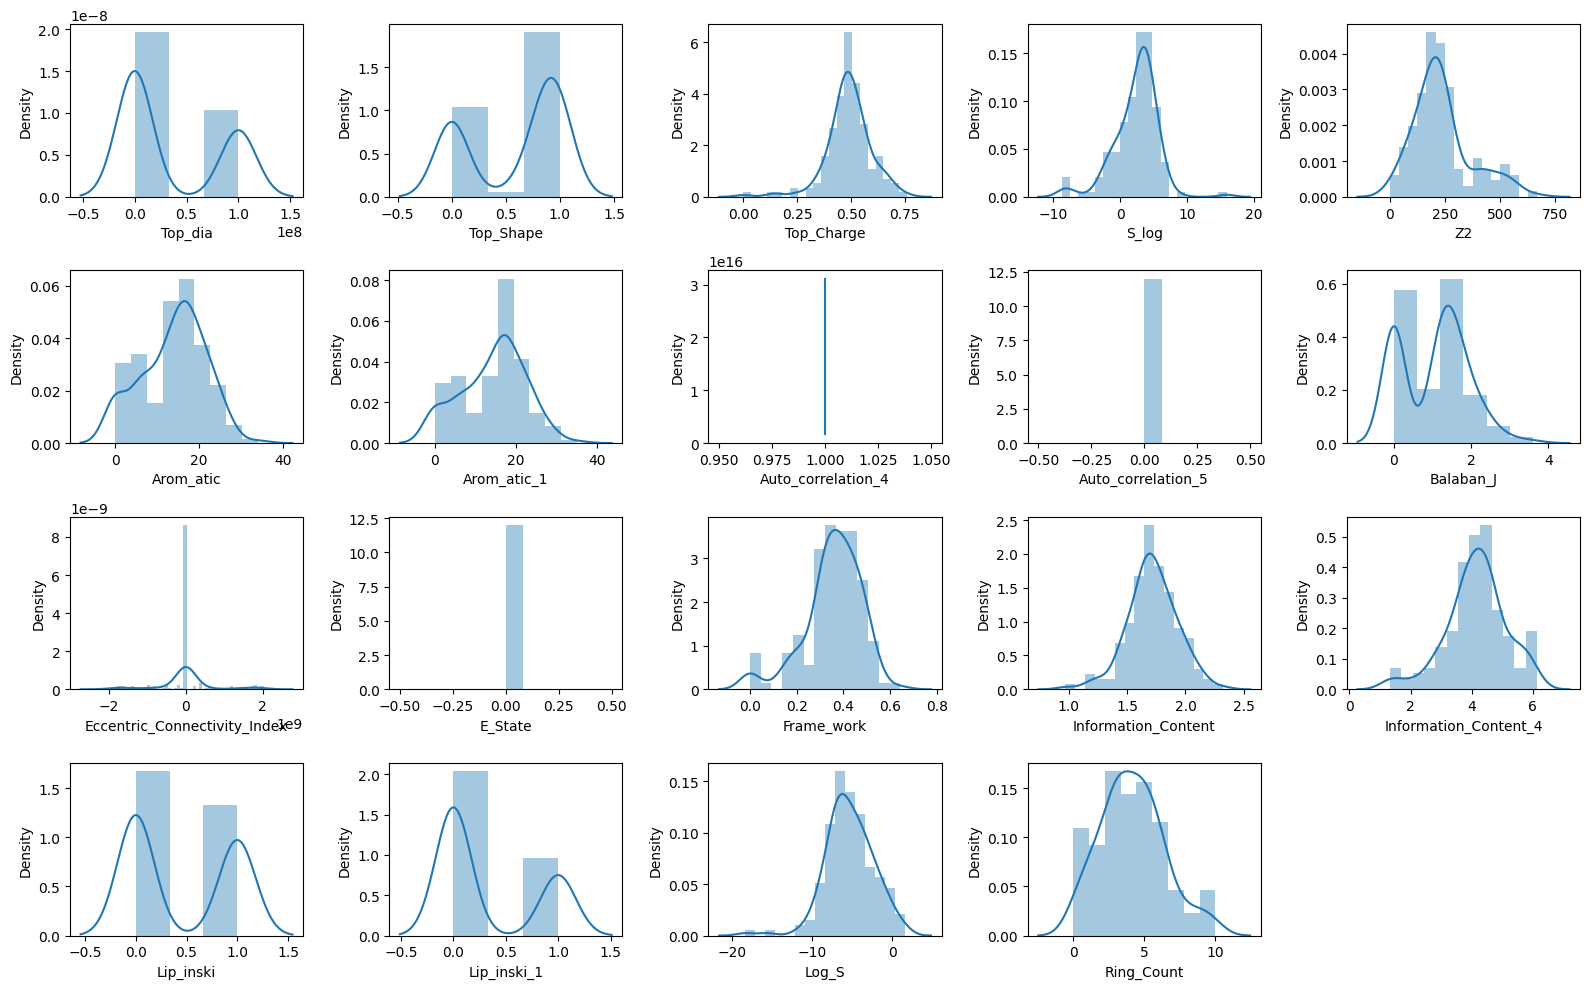

In [ ]:
i=0
plt.figure(figsize=(16,10))
for col in non_skewed_cols:
  i+=1
  plt.subplot(4,5,i)
  sns.distplot(df[col])
  plt.xlabel(f'{col}')
plt.tight_layout()
plt.savefig('NSD.eps')
  # plt.show()

In [ ]:
# for col in X1:
#   sns.distplot(df[col],color='darkblue')
#   plt.show()

In [ ]:
# for col in X1:
#   print(col in skewed_cols)

In [ ]:
# nonskewed_cols=X1.copy()

# for col in non_skewed_cols:
#   L=np.mean(df[col])-3*np.std(df[col])
#   U=np.mean(df[col])+3*np.std(df[col])
#   df[col]=np.where(df[col]>U,U,np.where(df[col]<L,L,df[col]))

# for col in nonskewed_cols:
#   L=np.quantile(df[col],0.05)
#   U=np.quantile(df[col],0.95)
#   for j in df[col]:
#     if j>U:
#       print(col)
#       break


In [ ]:

# i=0
# plt.figure(figsize=(16,10))
# for col in X1:
#   i+=1
#   plt.subplot(4,5,i)
#   sns.boxplot(df[col])
#   plt.xlabel(f'{col}')
# plt.tight_layout()

#   # plt.show()

In [ ]:
# non_skewed_cols

for col in non_skewed_cols:
  L=np.quantile(df[col],0.05)
  U=np.quantile(df[col],0.95)
  df[col]=np.where(df[col]>U,U,np.where(df[col]<L,L,df[col]))



In [ ]:
# for col in nonskewed_cols:
#   L=np.quantile(df[col],0.05)
#   U=np.quantile(df[col],0.95)
#   for j in df[col]:
#     if j>U:
#       print(col)
#       break

In [ ]:
# U=np.percentile(df['Top_Charge'],95)
# U

In [ ]:
# df['Top_Charge'].max()

<ipython-input-38-45d675ddac03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-38-45d675ddac03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-38-45d675ddac03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

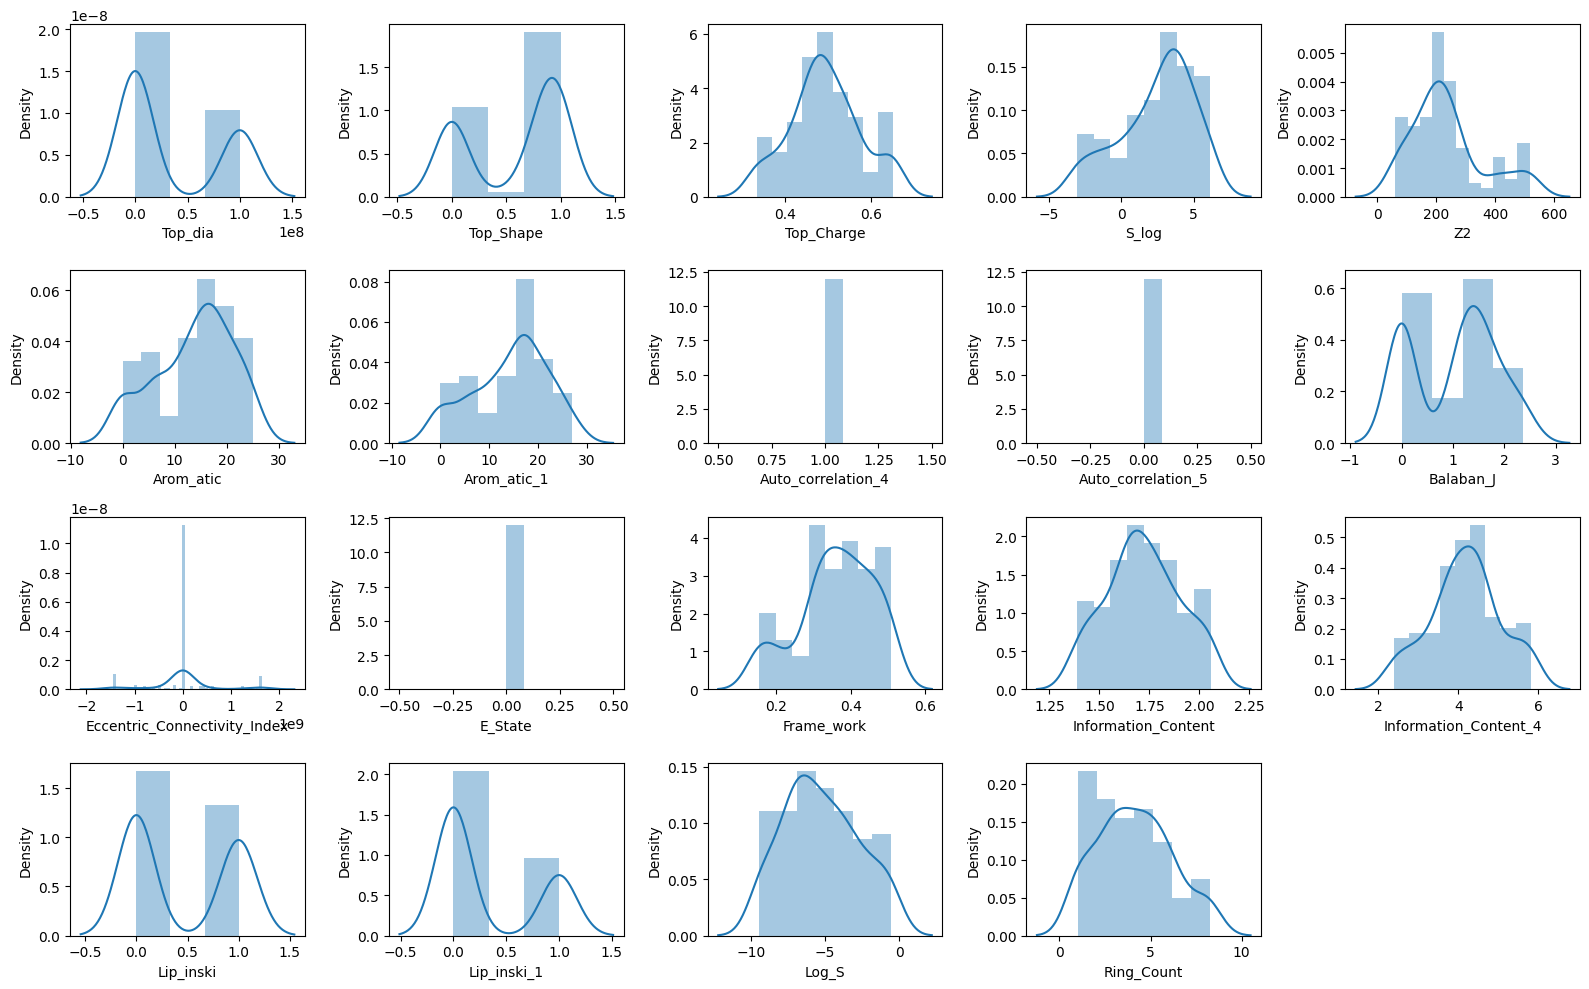

In [ ]:
i=0
plt.figure(figsize=(16,10))
for col in non_skewed_cols:
  i+=1
  plt.subplot(4,5,i)
  sns.distplot(df[col])
  plt.xlabel(f'{col}')
plt.tight_layout()
plt.savefig('NSDA.eps')
  # plt.show()

In [ ]:
# i=0
# plt.figure(figsize=(16,10))
# for col in X1:
#   i+=1
#   plt.subplot(4,5,i)
#   sns.boxplot(df[col])
#   plt.xlabel(f'{col}')
# plt.tight_layout()
# # plt.savefig('NotSkewedDistributionsadjust.eps')
#   # plt.show()

In [ ]:
# nonskewed_cols=X1.copy()

# for col in nonskewed_cols:
#   # L=np.quantile(df[col],0.003)
#   # U=np.quantile(df[col],0.997)
#   mean_col=np.mean(df[col])
#   std_col=np.std(df[col])
#   df[col]=np.where(df[col]>mean_col+3*std_col,mean_col+3*std_col,np.where(df[col]<mean_col-3*std_col,mean_col-3*std_col,df[col]))

In [ ]:
# for col in X1:
#   sns.distplot(df[col],color='darkblue')
#   plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-2]
y=df.iloc[:,-2]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# for col in X.columns:
#   if df[col].skew()>1 or df[col].skew()<-1:
#     print('Yes')
#     print(col)
#     plt.box(df[col])

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=20)
# pca.fit(X_train)
# X_train=pca.transform(X_train)
# X_test=pca.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pLR=LR.predict(X_test)
LRr2=r2_score(y_test,y_pLR)
LRmse=mean_squared_error(y_test,y_pLR)

In [ ]:
Las=Lasso()
Las.fit(X_train,y_train)
y_pLas=Las.predict(X_test)
Lasr2=r2_score(y_test,y_pLas)
Lasmse=mean_squared_error(y_test,y_pLas)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+01, tolerance: 5.252e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
Rid=Ridge(solver='cholesky')
Rid.fit(X_train,y_train)
y_pRid=Rid.predict(X_test)
Ridr2=r2_score(y_test,y_pRid)
Ridmse=mean_squared_error(y_test,y_pRid)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.9647e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# pca_comp=list(pca.get_feature_names_out())

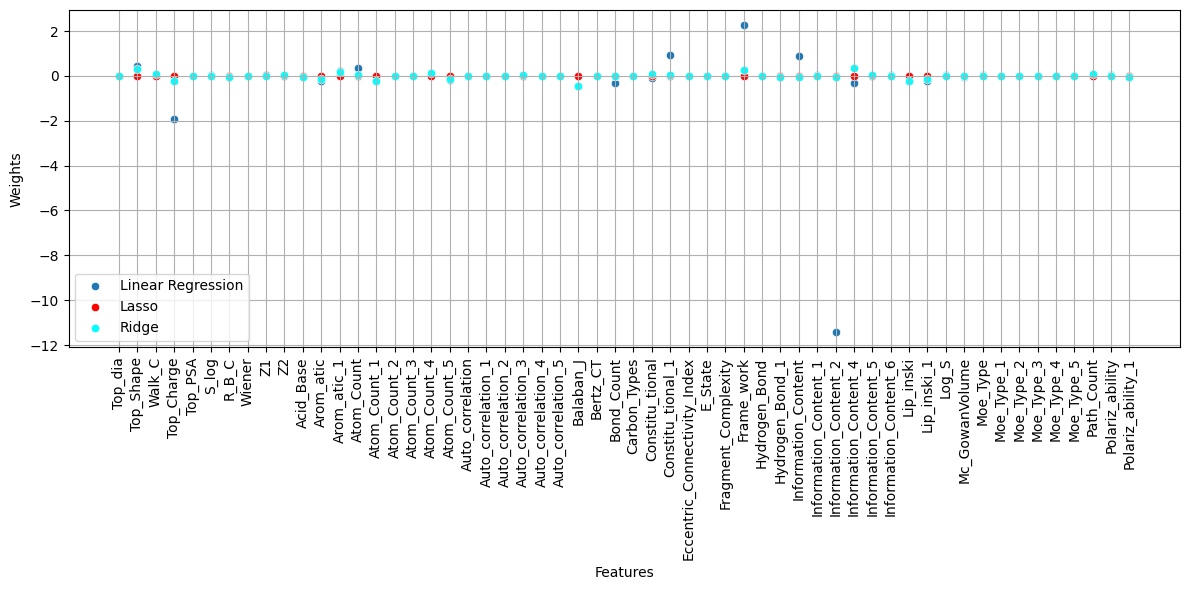

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X.columns,y=LR.coef_,label='Linear Regression')
sns.scatterplot(x=X.columns,y=Las.coef_,color='red',label='Lasso')
sns.scatterplot(x=X.columns,y=Rid.coef_,color='cyan',label='Ridge')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('OA_weights.eps')
# plt.show()

In [ ]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x=pca_comp,y=LR.coef_,label='Linear Regression')
# sns.scatterplot(x=pca_comp,y=Las.coef_,color='red',label='Lasso')
# sns.scatterplot(x=pca_comp,y=Rid.coef_,color='cyan',label='Ridge')
# plt.xlabel('Features')
# plt.ylabel('Weights')
# plt.xticks(rotation=90)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
LRr2,Lasr2,Ridr2

(0.9135764807122275, 0.95278510208735, 0.9366641809147287)

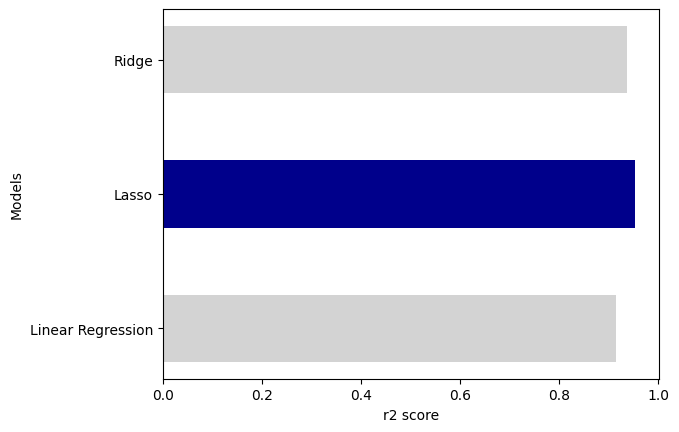

In [ ]:
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','darkblue','lightgrey'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
plt.show()

In [ ]:
LRmse,Lasmse,Ridmse

(0.3318528103901576, 0.18129783065677707, 0.2431996490657095)

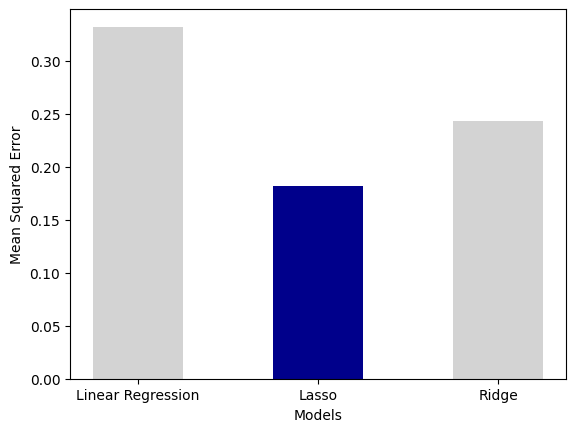

In [ ]:
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','darkblue','lightgrey'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

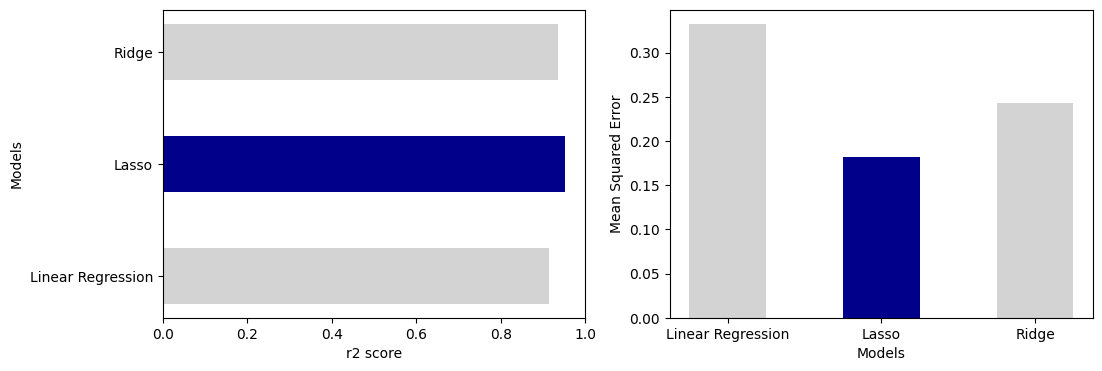

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','darkblue','lightgrey'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
# plt.show()
plt.subplot(1,2,2)
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','darkblue','lightgrey'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
# plt.show()
plt.savefig('OA_r2mse.eps')

In [ ]:
df_weights=pd.DataFrame({
    'Features':X.columns,
    'Linear Regression':LR.coef_,
    'Lasso':Las.coef_,
    'Ridge':Rid.coef_
})
for i in df_weights.columns:
  if i!='Features':
    print(f"{i}: {df_weights.sort_values(i,ascending=False).head(1)['Features'].values}")

Linear Regression: ['Frame_work']
Lasso: ['Z1']
Ridge: ['Information_Content_4']


In [ ]:
float(LR.intercept_),float(Las.intercept_),float(Rid.intercept_)

(4.448198487029591, 1.7517839072906751, 0.3104463718658579)